<a href="https://colab.research.google.com/github/sowmini4901/HandWrittenDigitsRecognition/blob/main/handwrittendigitsrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install tensorflow

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [35]:
len(X_train)

60000

In [36]:
len(X_test)

10000

In [37]:
X_train[0].shape

(28, 28)

In [38]:
X_test[0].shape

(28, 28)

In [39]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

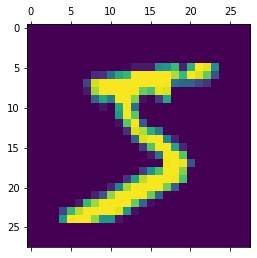

In [40]:
plt.matshow(X_train[0])

In [41]:
y_train[0]

5

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [43]:
#scaling of images. Which will lead to the image values between 0 and 1
#technique to improve the accuracy of machine learning model
X_train=X_train/255
X_test=X_test/255

In [44]:
#flattening the 2d matrices of images from the dataset
#and storing them in respective variables
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [45]:
X_test_flattened.shape

(10000, 784)

In [46]:
#flattened matrix of one image. This is the images that we are feeding into the neural network
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
#for this model we got 92% accuracy. That means 92% of the time this model will be accurate
model = keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')             
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4705 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9257


In [48]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9242


[0.2684575915336609, 0.9241999983787537]

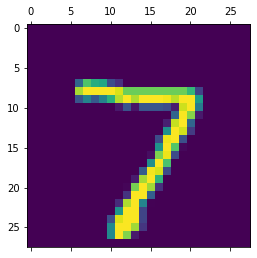

In [49]:
plt.matshow(X_test[0])

In [50]:
y_test[0]

7

In [51]:
#testing the model against the testing dataset and printing the outputs
y_predicted=model.predict(X_test_flattened)
#y_predicted[0]
for i in range(len(X_test)):
  print(i,np.argmax(y_predicted[i])==y_test[i],np.argmax(y_predicted[i]),y_test[i])

Streaming output truncated to the last 5000 lines.
5000 True 3 3
5001 True 9 9
5002 True 9 9
5003 True 8 8
5004 True 4 4
5005 True 1 1
5006 True 0 0
5007 True 6 6
5008 True 0 0
5009 True 9 9
5010 True 6 6
5011 True 8 8
5012 True 6 6
5013 True 1 1
5014 True 1 1
5015 True 9 9
5016 True 8 8
5017 True 9 9
5018 True 2 2
5019 True 3 3
5020 True 5 5
5021 True 5 5
5022 True 9 9
5023 True 4 4
5024 True 2 2
5025 True 1 1
5026 True 9 9
5027 True 4 4
5028 True 3 3
5029 True 9 9
5030 True 6 6
5031 True 0 0
5032 True 4 4
5033 True 0 0
5034 True 6 6
5035 True 0 0
5036 True 1 1
5037 True 2 2
5038 True 3 3
5039 True 4 4
5040 True 7 7
5041 True 8 8
5042 True 9 9
5043 True 0 0
5044 True 1 1
5045 True 2 2
5046 True 3 3
5047 True 4 4
5048 True 7 7
5049 True 8 8
5050 True 9 9
5051 True 0 0
5052 True 1 1
5053 True 2 2
5054 False 5 3
5055 True 4 4
5056 True 5 5
5057 True 6 6
5058 True 7 7
5059 True 8 8
5060 True 9 9
5061 True 8 8
5062 True 3 3
5063 True 4 4
5064 True 7 7
5065 False 1 8
5066 True 6 6
5067 Fals

In [52]:
np.argmax(y_predicted[9970])

3

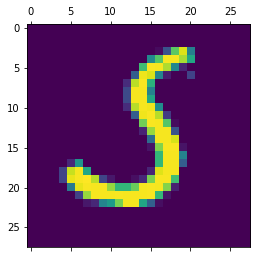

In [53]:
plt.matshow(X_test[9970])

In [54]:
y_test[9970]

5

In [55]:
#making of confusion matrix
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    4,    4,    1,    1],
       [   0, 1114,    2,    2,    0,    1,    4,    2,   10,    0],
       [   6,    9,  910,   19,   12,    5,   12,   15,   40,    4],
       [   4,    0,   16,  919,    0,   29,    2,   14,   16,   10],
       [   1,    1,    3,    1,  900,    0,   10,    5,    9,   52],
       [  11,    3,    1,   26,   10,  786,   13,    7,   28,    7],
       [  14,    3,    4,    1,    8,   13,  910,    2,    3,    0],
       [   1,    5,   20,    5,    2,    0,    0,  957,    3,   35],
       [  10,    8,    6,   22,    9,   31,    8,   13,  851,   16],
       [  11,    7,    1,    9,   15,    7,    0,   26,    2,  931]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

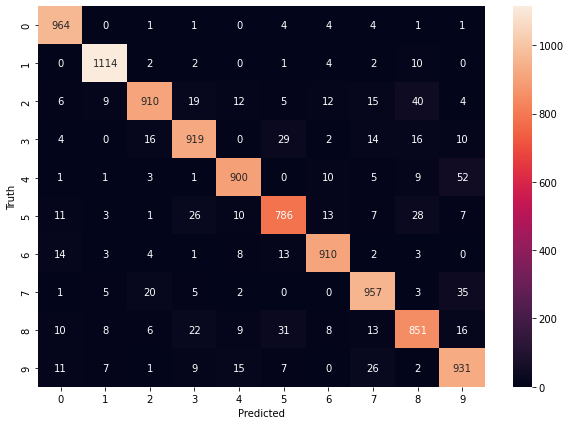

In [57]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
#Adding a hidden layer
model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')             
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9844


In [59]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9772


[0.07632026076316833, 0.9771999716758728]

Text(69.0, 0.5, 'Truth')

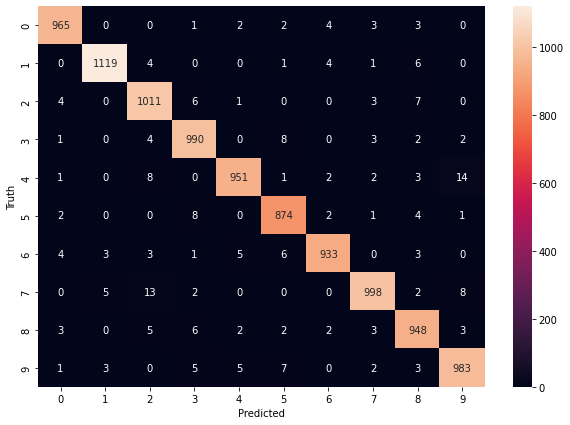

In [60]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),                     
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')             
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.9200
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9836
